In [2]:
import numpy as np              
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
print ("Prueba de que opencv esta instalado:")
print (cv2.__version__)

Prueba de que opencv esta instalado:
3.1.0


## Convolución

La convolución es una operación básica en el tratamiento de imágenes. La figura siguiente lo ilustra. Dada una máscara (de tamaño 3x3 en este caso) se va deslizando por las distintas posiciones de la imagen. En cada paso, se multipica cada elemento de la máscara con los valores de los pixeles con los que corresonde en la imagen y, finalmente, se suman los valores obtenidos (nueve valores en este caso).
<img src="Convolution_schematic.gif">

<small>Fuente imagen: Tutorial _Unsupervised Feature Learning Learning Deep Learning_ de Stanford (<a href="http://deeplearning.stanford.edu/tutorial/">sitio web</a>).</small>

Dependiendo del valor de la máscara obtendremos distintos efectos y propiedades (_features_) de la imagen.

## Operador Sobel

En pocas palabras el operador sobel es un operador diferencial que calcula una aproximación al gradiente de la 
función de intensidad de una imagen. Para cada punto de la imagen a procesar, el resultado del operador Sobel 
es tanto el vector gradiente correspondiente como la norma o magnitud de éste vector.

Es asi que el operador Sobel calcula el gradiente de la intensidad de una imagen en cada punto (píxel). Así, **para cada punto, este operador da la magnitud del mayor cambio posible**, la dirección de éste y el sentido desde oscuro a claro. El resultado muestra cómo de abruptamente o suavemente cambia una imagen en cada punto analizado y, en consecuencia, cuán probable es que éste represente un borde en la imagen y, también, la orientación a la que tiende ese borde.

**Para cada punto de la imagen, el vector gradiente apunta en dirección del incremento máximo posible de la intensidad, y la magnitud del vector gradiente corresponde a la cantidad de cambio de la intensidad en esa dirección.**

Lo dicho en los párrafos anteriores implica que el resultado de aplicar el operador Sobel sobre una región con intensidad de imagen constante es un vector cero, y el resultado de aplicarlo en un punto sobre un borde es un vector que cruza el borde (perpendicular) cuyo sentido es de los puntos más oscuros a los más claros.

Matemáticamente, el operador utiliza **kernels o mascaras 3×3** elementos para aplicar convolución a la imagen original para calcular aproximaciones a las derivadas, un kernel para los cambios horizontales y otro para las verticales.

Si definimos **A** como la imagen original, el resultado, que son las dos imágenes **Gx** y **Gy** que representan para cada punto las aproximaciones horizontal y vertical de las derivadas de intensidades, es calculado como:
<img src="gs.png">

En cada punto de la imagen, los resultados de las aproximaciones de los gradientes horizontal y vertical pueden ser combinados para obtener la magnitud del gradiente, mediante:
<img src="mag.png">

Con esta información, podemos calcular también la dirección del gradiente:
<img src="ang.png">

In [3]:
#cargo una imagen de prueba
img=cv2.imread("lenna_1.jpg")

Tamaño de la imagen img: (512, 512, 3)


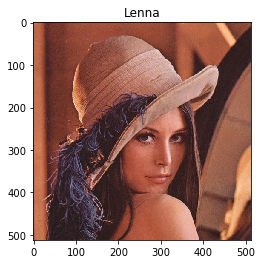

In [4]:
#se representa la imagen de lenna, junto con su tamaño
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.title("Lenna")
print ("Tamaño de la imagen img:",img.shape)

In [5]:
sobelx1 = np.absolute(cv2.Sobel(img,cv2.CV_64F,1,0,ksize=3))
sobelx1_u8=np.uint8(sobelx1)

sobely1 = np.absolute(cv2.Sobel(img,cv2.CV_64F,0,1,ksize=3))
sobely1_u8=np.uint8(sobely1)

print ("Tamaño de sobelx:",sobelx1.shape)
print ("Tamaño de sobely:",sobely1.shape)

Tamaño de sobelx: (512, 512, 3)
Tamaño de sobely: (512, 512, 3)


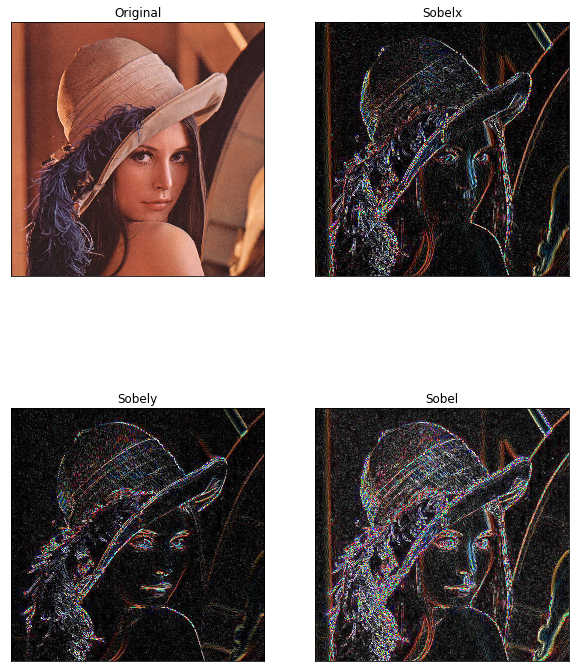

In [11]:
plt.figure(figsize=(10,13))
plt.subplot(221),plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.title('Original'), plt.xticks([]), plt.yticks([])

plt.subplot(222),plt.imshow(cv2.cvtColor(sobelx1_u8,cv2.COLOR_BGR2RGB))
plt.title('Sobelx'), plt.xticks([]), plt.yticks([])

plt.subplot(223),plt.imshow(cv2.cvtColor(sobely1_u8,cv2.COLOR_BGR2RGB))
plt.title('Sobely'), plt.xticks([]), plt.yticks([])

plt.subplot(224),plt.imshow(cv2.cvtColor(sobelx1_u8+sobely1_u8,cv2.COLOR_BGR2RGB))
plt.title('Sobel'), plt.xticks([]), plt.yticks([])

plt.show()

In [12]:
sobelx1_u8 = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=3)
sobely1_u8 = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=3)
s_mag,s_dir=cv2.cartToPolar(sobelx1,sobely1)

In [13]:
print("Punto (120,140) en:")
print("Sobelx:",sobelx1[120,140,:])
print("Sobely:",sobely1[120,140,:])
print("Magnitud:",s_mag[120,140,:])
print("Angulo:",s_dir[120,140,:])

Punto (120,140) en:
Sobelx: [ 58.  58.  61.]
Sobely: [  72.   56.  105.]
Magnitud: [  92.45539465   80.62257748  121.43310916]
Angulo: [ 0.89270741  0.76792902  1.04454434]


### Otro ejemplo

In [14]:
sobelx2 = np.absolute(cv2.Sobel(cv2.cvtColor(img,cv2.COLOR_BGR2GRAY),cv2.CV_64F,1,0,ksize=3))
sobelx2_u8=np.uint8(sobelx2)

sobely2 = np.absolute(cv2.Sobel(cv2.cvtColor(img,cv2.COLOR_BGR2GRAY),cv2.CV_64F,0,1,ksize=3))
sobely2_u8=np.uint8(sobely2)

print ("Tamaño de sobelx:",sobelx2.shape)
print ("Tamaño de sobely:",sobely2.shape)

Tamaño de sobelx: (512, 512)
Tamaño de sobely: (512, 512)


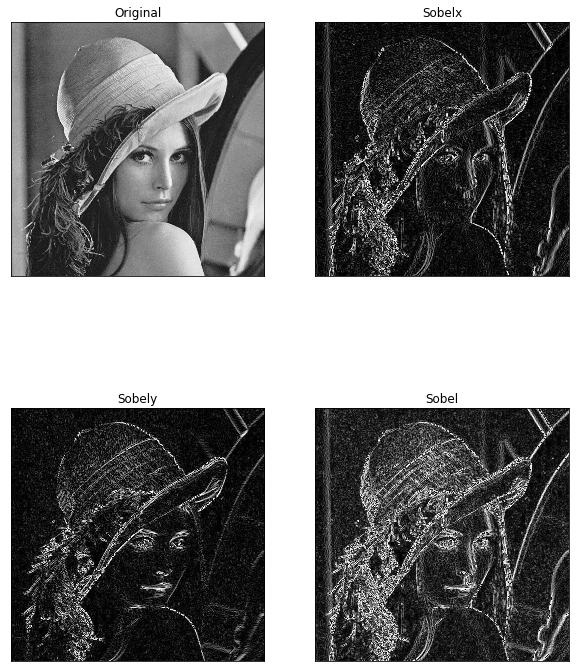

In [15]:
plt.figure(figsize=(10,13))
plt.subplot(221),plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2GRAY),cmap=plt.cm.Greys_r)
plt.title('Original'), plt.xticks([]), plt.yticks([])

plt.subplot(222),plt.imshow(sobelx2_u8,cmap=plt.cm.Greys_r)
plt.title('Sobelx'), plt.xticks([]), plt.yticks([])

plt.subplot(223),plt.imshow(sobely2_u8,cmap=plt.cm.Greys_r)
plt.title('Sobely'), plt.xticks([]), plt.yticks([])

plt.subplot(224),plt.imshow(sobelx2_u8+sobely2_u8,cmap=plt.cm.Greys_r)
plt.title('Sobel'), plt.xticks([]), plt.yticks([])

plt.show()

## Operador Laplace

En cálculo vectorial, el operador laplaciano o laplaciano es un operador diferencial elíptico de segundo orden, denotado como Δ, relacionado con ciertos problemas de minimización de ciertas magnitudes sobre un cierto dominio.

Expresado en coordenadas cartesianas es igual a la suma de todas las segundas derivadas parciales no mixtas dependientes de una variable. Corresponde a div (grad φ), de donde el uso del símbolo delta (Δ) o nabla cuadrado  para representarlo. 

En pocas palabras el operador laplace corresponde a la segunda derivada de la funcion intensidad de la imagen, en procesamiento de imagenes una forma rapida de calcular el operador es aplicando convolucion con una cierta mascara o kernel de **3x3**. Matematicamente la segunda derivada corresponde a:
<img src="laplace.png">

Ahora bien, la mascara correspondiente a esta operacion por convolucion es el siguiente:
<img src="laplace2.png">

In [8]:
#cargo una imagen de prueba
img2=cv2.imread("dave.jpg",0)

In [9]:
#se representa la imagen de lenna, junto con su tamaño
plt.imshow(cv2.cvtColor(img2,cv2.COLOR_BGR2RGB))
print ("tamaño de la imagen img:",img2.shape)

error: /home/travis/miniconda/conda-bld/conda_1486587069159/work/opencv-3.1.0/modules/imgproc/src/color.cpp:7341: error: (-215) scn == 3 || scn == 4 in function ipp_cvtColor


In [10]:
laplace3= np.absolute(cv2.Laplacian(img2,ddepth=-1,ksize=1))
print(laplace3.shape)
laplace3_u8=np.uint8(laplace3)

sobelx3 = np.absolute(cv2.Sobel(img2,-1,1,0,ksize=3))
sobelx3_u8=np.uint8(sobelx3)

sobely3 = np.absolute(cv2.Sobel(img2,-1,0,1,ksize=3))
sobely3_u8=np.uint8(sobely3)

(563, 558)


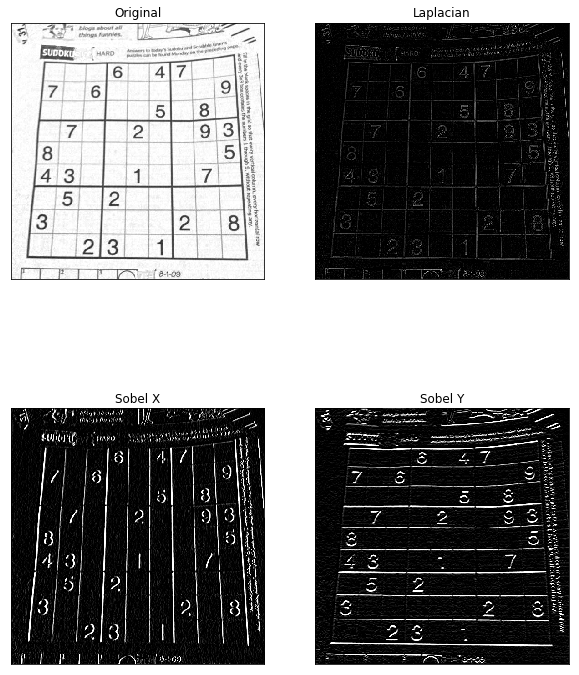

In [19]:
plt.figure(figsize=(10,13))
plt.subplot(2,2,1),plt.imshow(cv2.cvtColor(img2,cv2.COLOR_BGR2RGB))
plt.title('Original'), plt.xticks([]), plt.yticks([])

plt.subplot(2,2,2),plt.imshow(cv2.cvtColor(laplace3_u8,cv2.COLOR_BGR2RGB))
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])

plt.subplot(2,2,3),plt.imshow(cv2.cvtColor(sobelx3_u8,cv2.COLOR_BGR2RGB))
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])

plt.subplot(2,2,4),plt.imshow(cv2.cvtColor(sobely3_u8,cv2.COLOR_BGR2RGB))
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])

plt.show()

### Otro Ejemplo

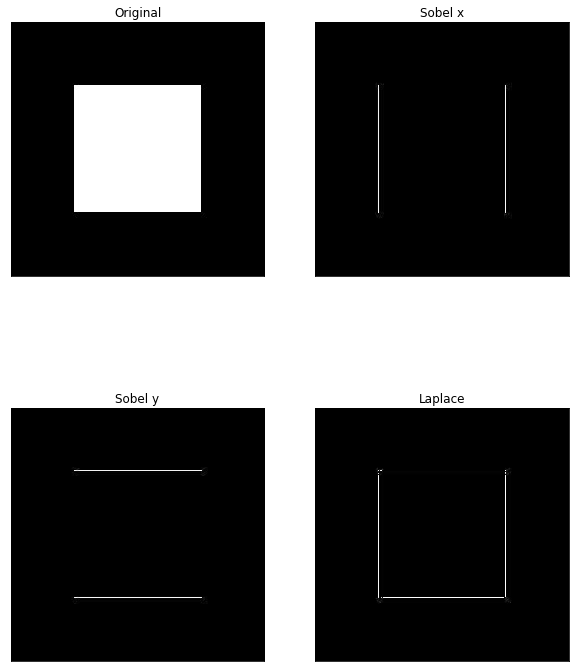

In [20]:

img3 = cv2.imread("box.jpeg")

sobelx4=np.absolute(cv2.Sobel(img3,cv2.CV_64F,1,0,ksize=3))
sobelx4_u8 = np.uint8(sobelx4)

sobely4 = np.absolute(cv2.Sobel(img3,cv2.CV_64F,0,1,ksize=3))
sobely4_u8 =np.uint8(sobely4)

laplace4= np.absolute(cv2.Laplacian(img3,ddepth=cv2.CV_64F,ksize=1))
laplace4_u8 =np.uint8(laplace4)

plt.figure(figsize=(10,13))
plt.subplot(2,2,1),plt.imshow(cv2.cvtColor(img3,cv2.COLOR_BGR2RGB))
plt.title('Original'), plt.xticks([]), plt.yticks([])

plt.subplot(2,2,2),plt.imshow(sobelx4_u8)
plt.title('Sobel x'), plt.xticks([]), plt.yticks([])

plt.subplot(2,2,3),plt.imshow(sobely4_u8)
plt.title('Sobel y'), plt.xticks([]), plt.yticks([])

plt.subplot(2,2,4),plt.imshow(laplace4_u8)
plt.title('Laplace'), plt.xticks([]), plt.yticks([])

plt.show()

